In [53]:
# Learning Practice 1 for the University of Tulsa's QM-7063 Data Mining Course
# Intro to data visualization
# Professor: Dr. Abdulrashid, Spring 2023
# Noah L. Schrick - 1492657

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
## Load data and convert to time series
# Amtrak
Amtrak_df = pd.read_csv('Amtrak.csv').squeeze("columns")
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, 
    format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values,
    index=Amtrak_df.Date)

# Boston housing data
housing_df = pd.read_csv('BostonHousing.csv')
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})


Text(0, 0.5, 'Avg. MEDV')

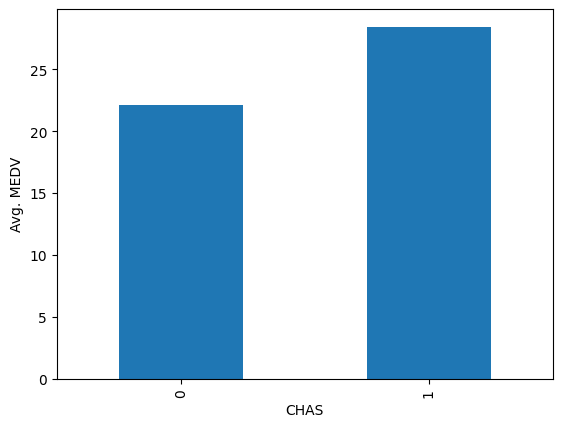

In [9]:
## Bar plot with pandas
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, 'Avg. MEDV')

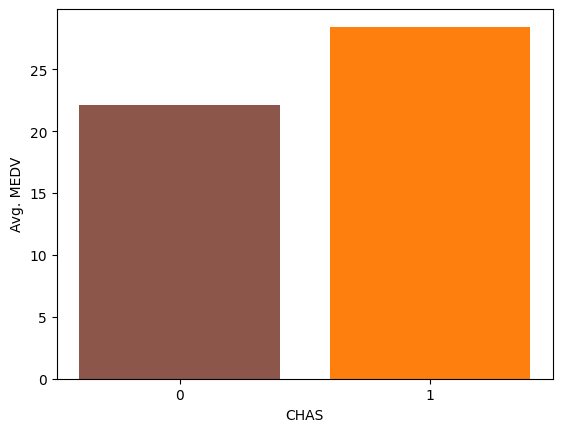

In [10]:
## Bar plot with matplotlib:
# compute mean MEDV per CHAS = (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks((0, 1), minor=False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

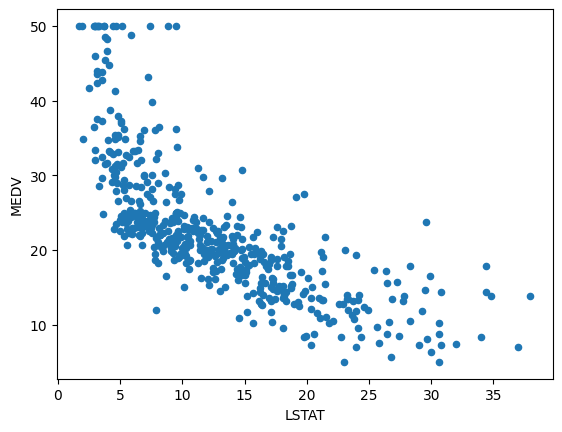

In [11]:
## Scatter plot with pandas
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

Text(0, 0.5, 'MEDV')

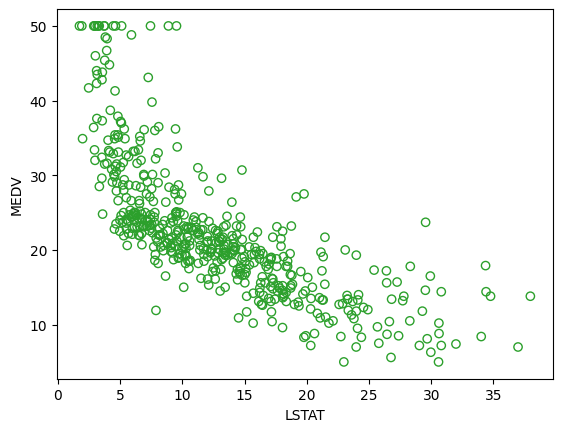

In [12]:
## Scatter plot with matplotlib
# Set the color of points and draw as open circles.
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT'); plt.ylabel('MEDV')

<AxesSubplot: xlabel='TAX', ylabel='RAD'>

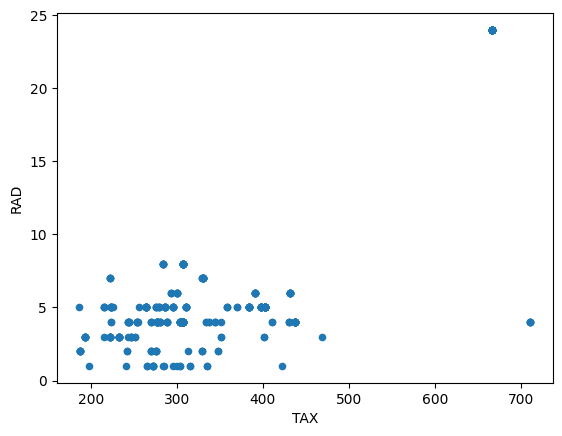

In [27]:
## Scatter plot with pandas for RAD and TAX
housing_df.plot.scatter(x='TAX', y='RAD', legend=False)

In [44]:
housing_df[['TAX', 'RAD']]


TAX  RAD
0    296    1
1    242    2
2    242    2
3    222    3
4    222    3
..   ...  ...
501  273    1
502  273    1
503  273    1
504  273    1
505  273    1

[506 rows x 2 columns]

Text(0, 0.5, 'Ridership (in 000s)')

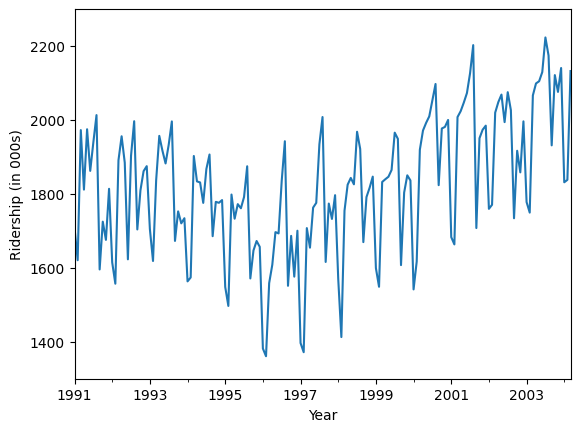

In [13]:
## Line plot using pandas
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

Text(0, 0.5, 'Ridership (in 000s)')

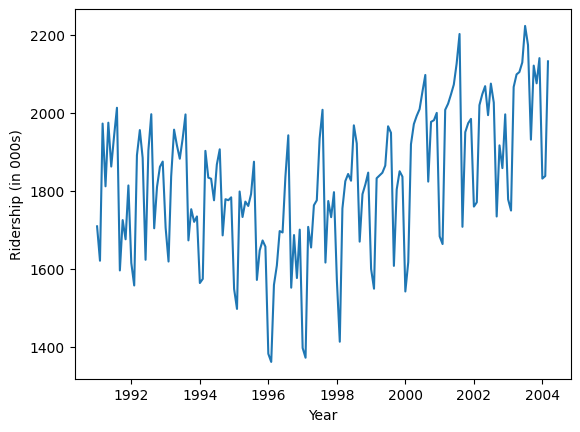

In [14]:
## Line plot using line matplotlib
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

Text(0, 0.5, 'count')

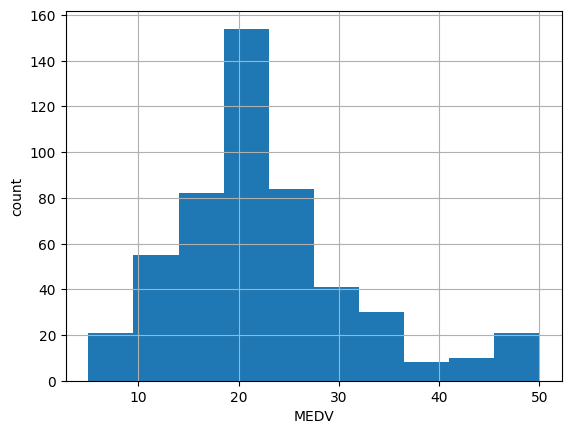

In [15]:
## Histogram
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count')

Text(0.5, 1.0, '')

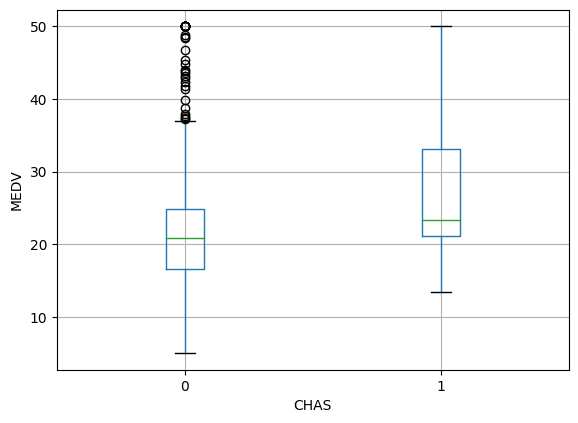

In [16]:
## Box plot
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')


<AxesSubplot: >

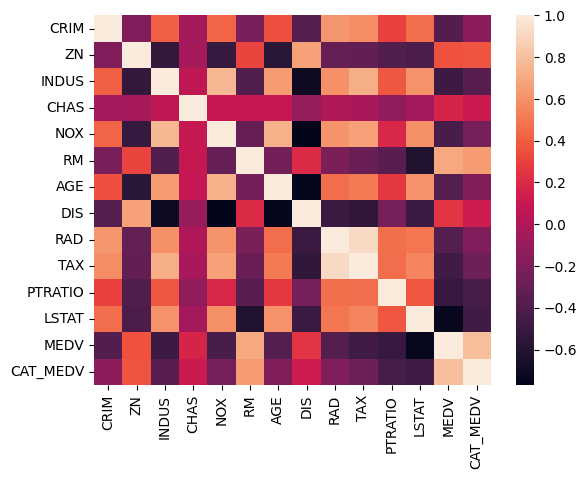

In [19]:
## Heatmap (without values)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

<AxesSubplot: >

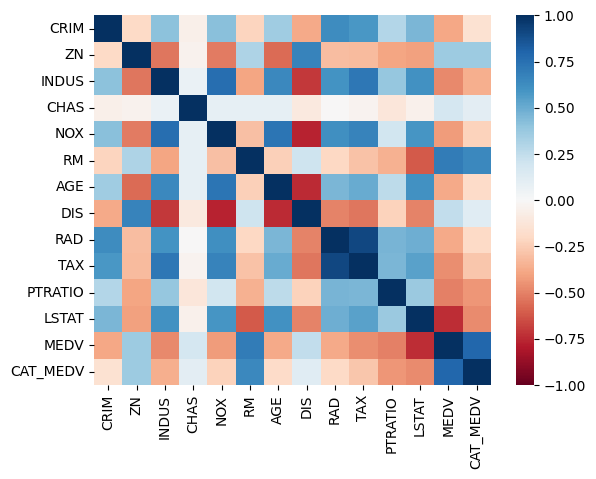

In [20]:
## Change to divergent scale and fix the range
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

<AxesSubplot: >

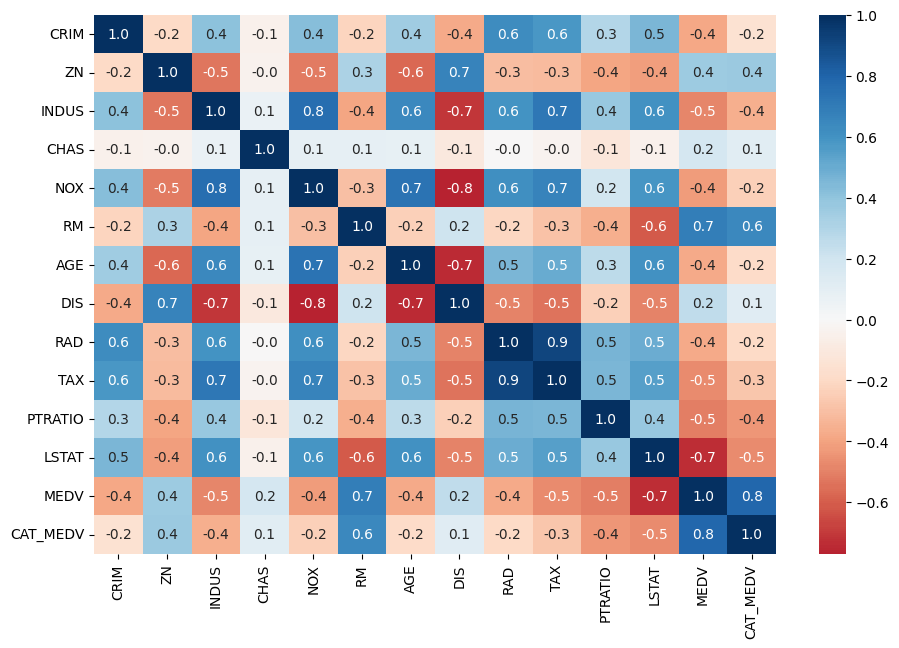

In [21]:
## Include information about values (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

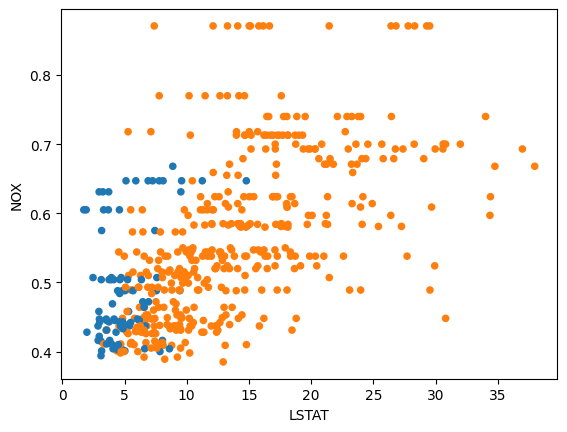

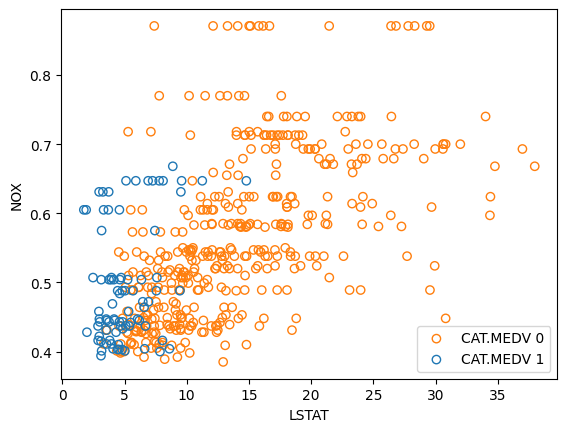

In [23]:
## NOX vs LSTAT for Boston Housing
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX',                       
    c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

# Plot first the data points for CAT.MEDV of 0 and then of 1
# Setting color to 'none' gives open circles
_, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])
plt.show()

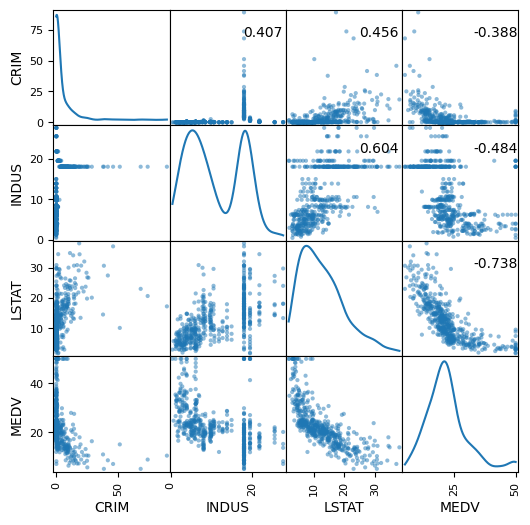

In [75]:
## Matrix scatterplot
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate('%.3f' %corr[i,j], (0.8, 0.8), 
                        xycoords='axes fraction', ha='center', va='center')
plt.show()


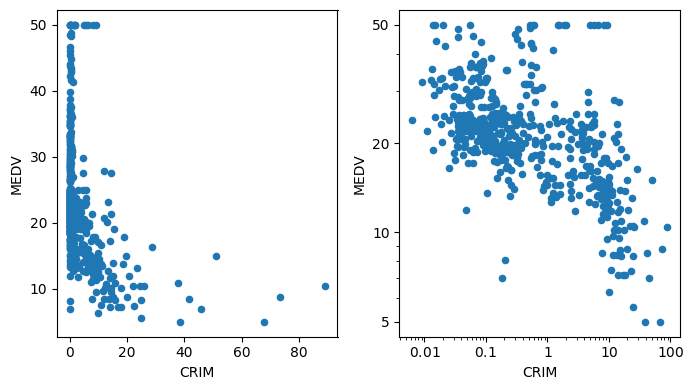

In [46]:
## Subplots- scatter plot, regular and log scale

# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, 
     ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout(); plt.show()
  

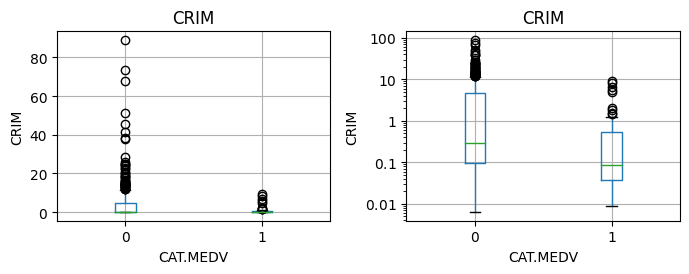

In [47]:
## Subplots -  boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM')
# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM'); ax.set_yscale('log')
# suppress the title
axes[0].get_figure().suptitle(''); plt.tight_layout(); plt.show()

Text(0, 0.5, 'Ridership (in 000s)')

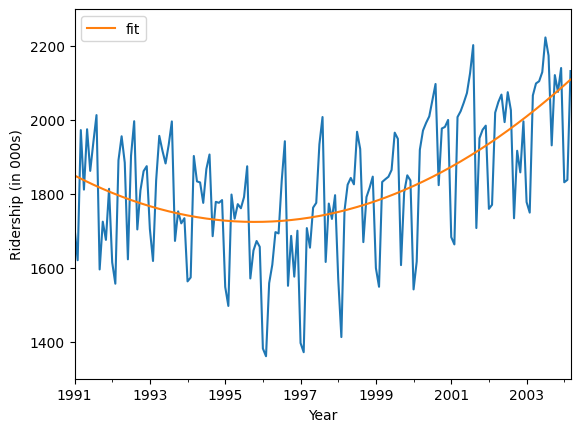

In [64]:
## Amtrak monthly ridership with a quadratic fit

Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, 
   format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display 
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), 
   Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in 
   range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False)

Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)')  # set x and y-axis label
